## Carbon Black

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv('Carbon Black Historical Data.csv')
df.info()
print('shape of data', df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          139 non-null    object 
 1   Price         139 non-null    float64
 2   Open          139 non-null    float64
 3   High          139 non-null    float64
 4   Low           139 non-null    float64
 5   Vol.          139 non-null    int64  
 6   CB_n330_Low   139 non-null    object 
 7   CB_n330_High  139 non-null    object 
 8   CB_n330_Avg   139 non-null    object 
 9   BCO_Close     139 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 11.0+ KB
shape of data (139, 10)


In [3]:
df.head()

,Date,Price,Open,High,Low,Vol.,CB_n330_Low,CB_n330_High,CB_n330_Avg,BCO_Close
0,1/2/2012,2.616,2.465,2.733,2.340,3230000,"1,402","1,550","1,476",122.66
1,1/3/2012,2.126,2.593,2.597,2.101,2470000,"1,480","1,636","1,558",122.88
2,1/4/2012,2.285,2.122,2.320,1.902,2440000,"1,543","1,705","1,624",119.47
3,1/5/2012,2.422,2.311,2.759,2.236,3180000,"1,568","1,734","1,651",101.43
4,1/6/2012,2.824,2.408,2.946,2.168,3100000,"1,538","1,700","1,619",97.88


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          139 non-null    datetime64[ns]
 1   Price         139 non-null    float64       
 2   Open          139 non-null    float64       
 3   High          139 non-null    float64       
 4   Low           139 non-null    float64       
 5   Vol.          139 non-null    int64         
 6   CB_n330_Low   139 non-null    object        
 7   CB_n330_High  139 non-null    object        
 8   CB_n330_Avg   139 non-null    object        
 9   BCO_Close     139 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 11.0+ KB


In [5]:
df.head()

,Date,Price,Open,High,Low,Vol.,CB_n330_Low,CB_n330_High,CB_n330_Avg,BCO_Close
0,2012-02-01,2.616,2.465,2.733,2.340,3230000,"1,402","1,550","1,476",122.66
1,2012-03-01,2.126,2.593,2.597,2.101,2470000,"1,480","1,636","1,558",122.88
2,2012-04-01,2.285,2.122,2.320,1.902,2440000,"1,543","1,705","1,624",119.47
3,2012-05-01,2.422,2.311,2.759,2.236,3180000,"1,568","1,734","1,651",101.43
4,2012-06-01,2.824,2.408,2.946,2.168,3100000,"1,538","1,700","1,619",97.88


In [6]:
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 2012-02-01 to 2023-08-01
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         139 non-null    float64
 1   Open          139 non-null    float64
 2   High          139 non-null    float64
 3   Low           139 non-null    float64
 4   Vol.          139 non-null    int64  
 5   CB_n330_Low   139 non-null    object 
 6   CB_n330_High  139 non-null    object 
 7   CB_n330_Avg   139 non-null    object 
 8   BCO_Close     139 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 10.9+ KB


In [7]:
df.tail()

,Price,Open,High,Low,Vol.,CB_n330_Low,CB_n330_High,CB_n330_Avg,BCO_Close
Date,,,,,,,,,
2023-04-01,2.410,2.085,2.529,1.946,2900000,"1,598","1,766","1,682",80.33
2023-05-01,2.266,2.398,2.685,2.031,2620000,"1,633","1,805","1,719",72.60
2023-06-01,2.798,2.255,2.839,2.136,2920000,"1,717","1,897","1,807",75.41
2023-07-01,2.634,2.729,2.793,2.463,2080000,"1,657","1,831","1,744",85.43
2023-08-01,2.768,2.644,3.018,2.425,3090000,"1,712","1,892","1,802",86.83


In [8]:
# scaler = MinMaxScaler()
# scaled_values = scaler.fit_transform(df[df.columns])

df = df.replace(',', '', regex=True)  # Remove commas
df = df.apply(pd.to_numeric, errors='coerce')  # Convert to numbers

df = df.fillna(0)  # Replace NaN with 0 (or use another strategy)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)



In [9]:
df_scaled = pd.DataFrame(scaled_values, columns=df.columns, index=df.index)

In [10]:
df_scaled.head()

,Price,Open,High,Low,Vol.,CB_n330_Low,CB_n330_High,CB_n330_Avg,BCO_Close
Date,,,,,,,,,
2012-02-01,0.130359,0.109746,0.106443,0.148852,0.401130,0.668571,0.669535,0.669078,0.997721
2012-03-01,0.064913,0.126836,0.089784,0.109672,0.186441,0.742857,0.743546,0.743219,1.000000
2012-04-01,0.086149,0.063952,0.055855,0.077049,0.177966,0.802857,0.802926,0.802893,0.964674
2012-05-01,0.104448,0.089186,0.109628,0.131803,0.387006,0.826667,0.827883,0.827306,0.777789
2012-06-01,0.158141,0.102136,0.132533,0.120656,0.364407,0.798095,0.798623,0.798373,0.741013


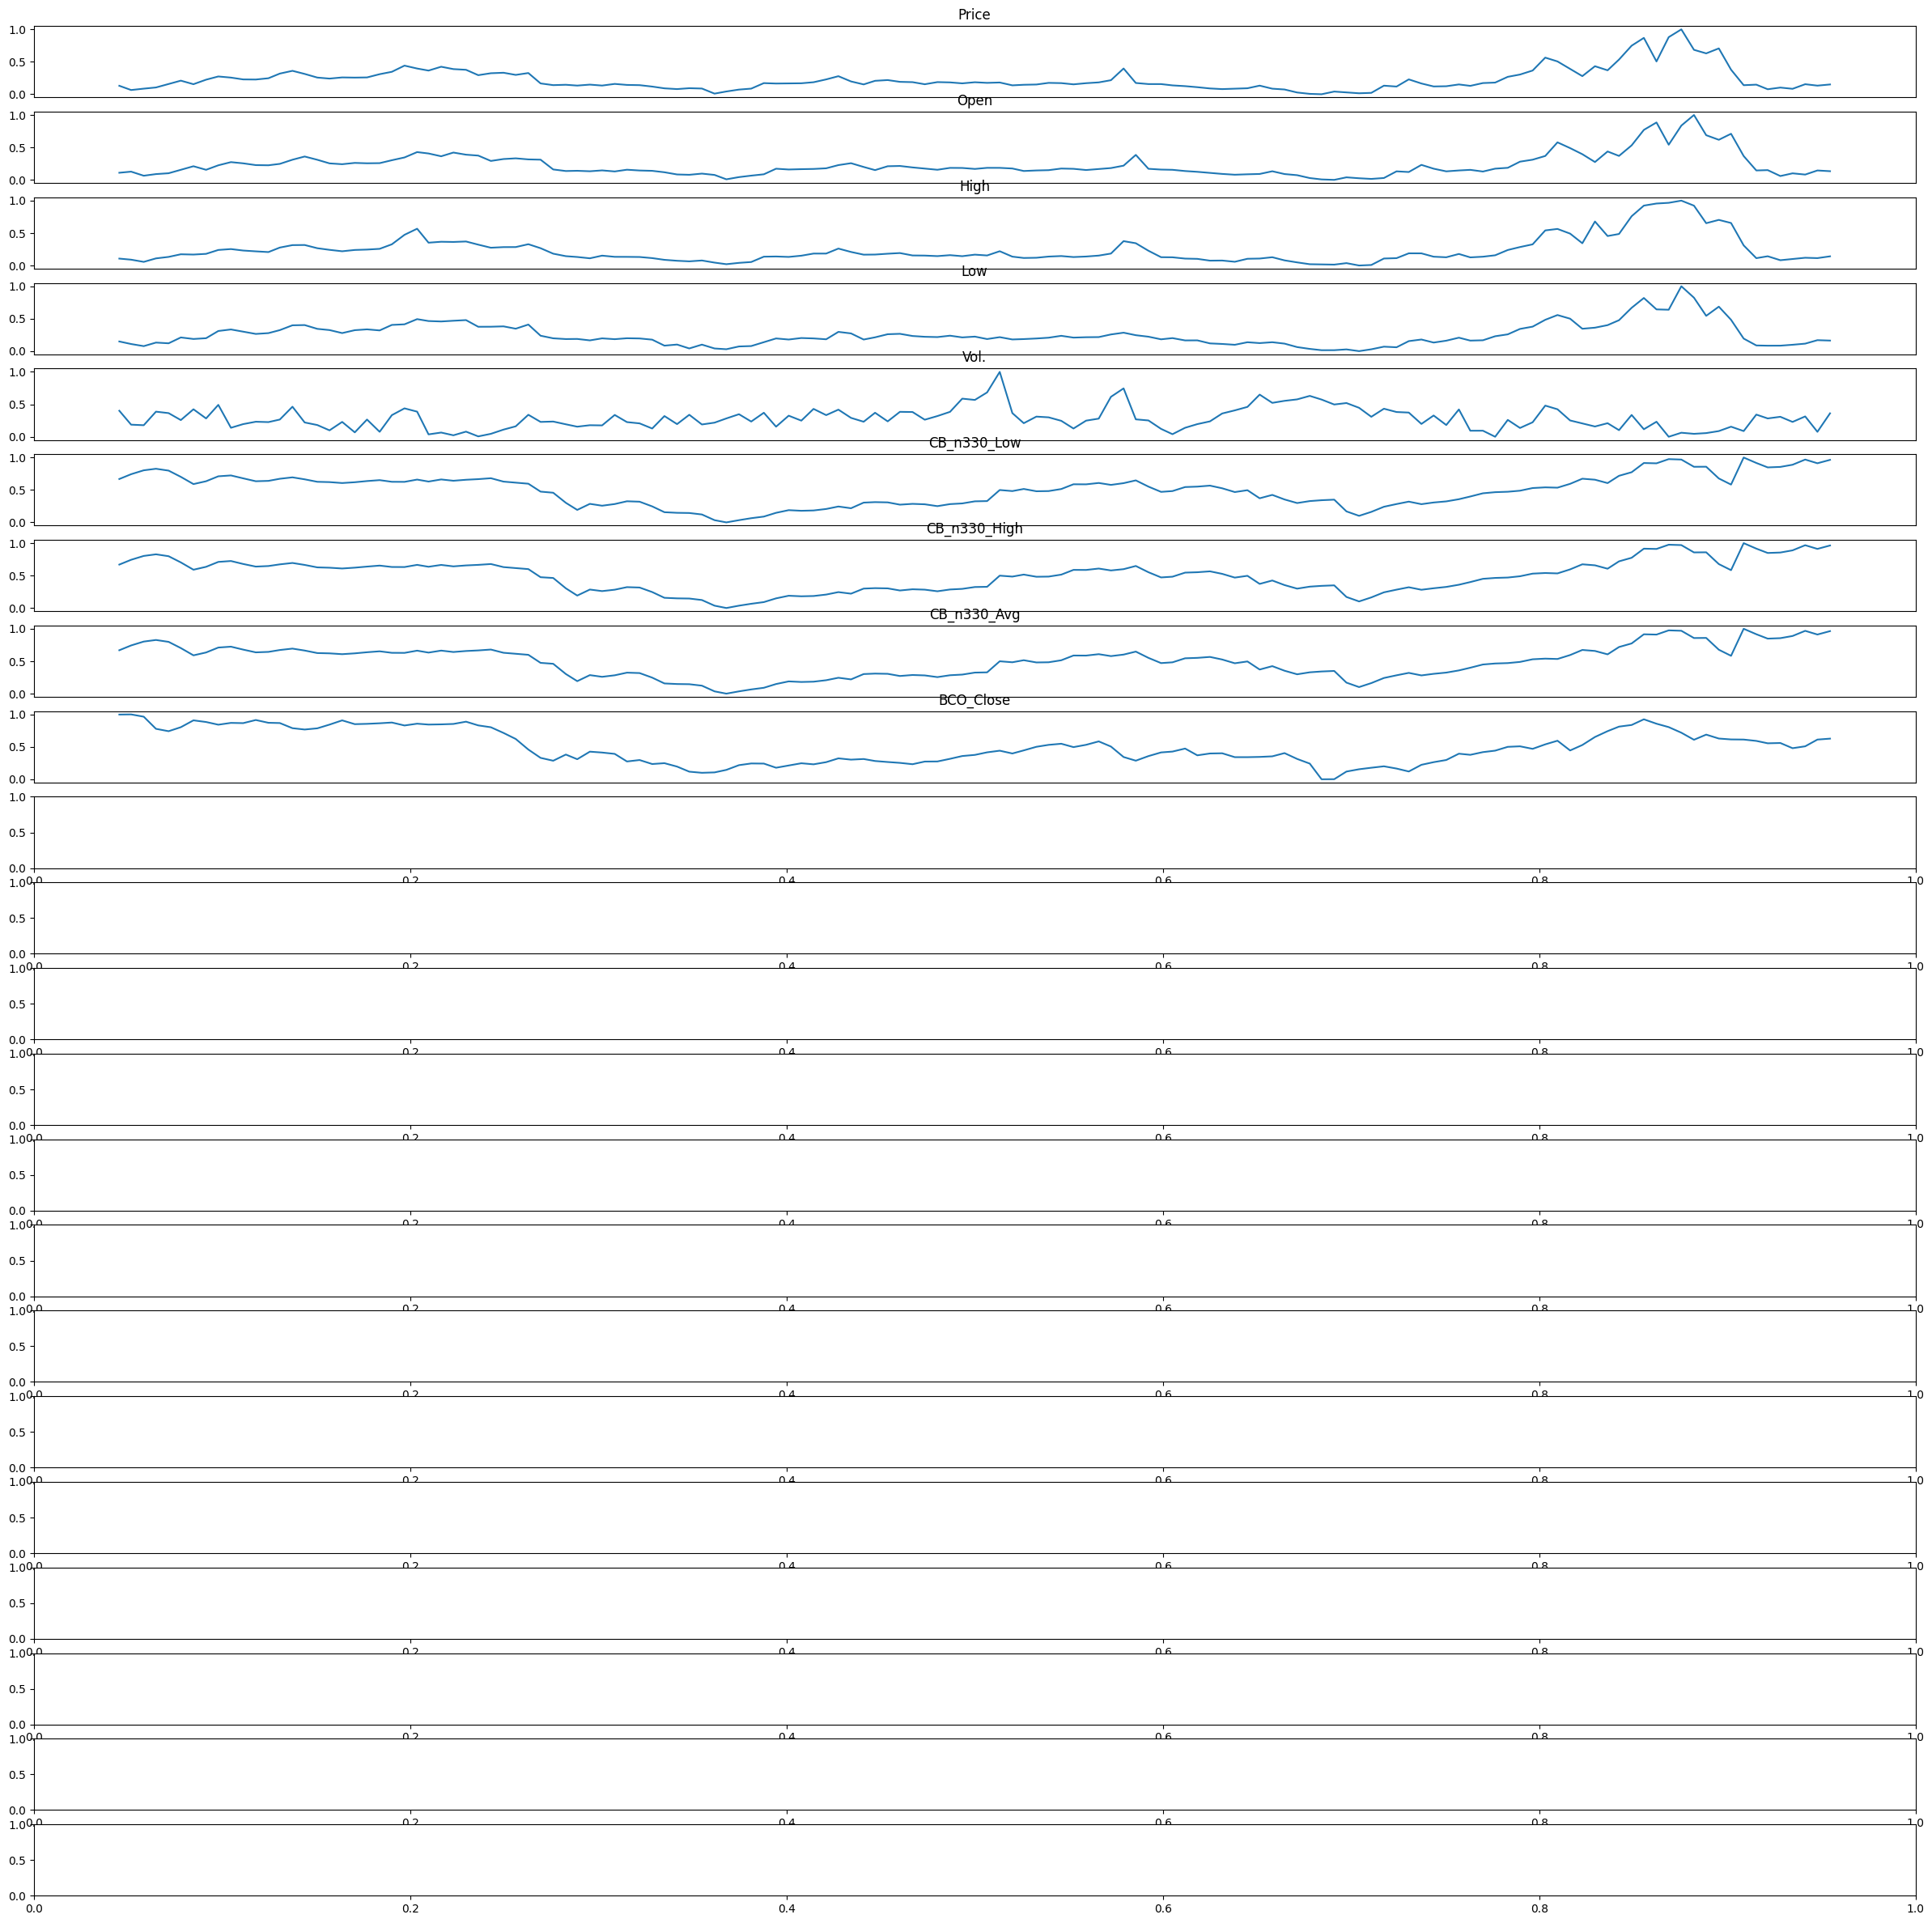

In [11]:
plt.rcParams['figure.figsize'] = (30, 30)
figure, axes = plt.subplots(22)

for ax, col in zip(axes, df_scaled.columns):
    ax.plot(df_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

In [12]:
def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

In [13]:
window_size = 100
X, y = create_sequence(df_scaled, window_size)

In [14]:
X.shape, y.shape

((39, 100, 9), (39, 9))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_test.shape

((31, 100, 9), (8, 9))

In [16]:
X_train.shape[1], X_train.shape[2]

(100, 9)

In [17]:
y_train.shape[1]

9

In [18]:
model = keras.Sequential([
    # first layer
    keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),

    # second layer
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.Dropout(0.3),

    # third layer
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.Dropout(0.3),

    # fourth layer
    keras.layers.LSTM(units=50, return_sequences=False),
    keras.layers.Dropout(0.3),

    # add output layer
    keras.layers.Dense(y_train.shape[1])
])

In [19]:
# compilation
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['RootMeanSquaredError'])

In [20]:
# early stopping condition
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

In [21]:
lstm_model = model.fit(X_train, y_train,
                       validation_split=0.2,
                       epochs=100,
                       batch_size=3,
                       callbacks=[early_stopping])

Epoch 1/100
8/8 [==============================] - 7s 230ms/step - loss: 0.1703 - root_mean_squared_error: 0.4127 - val_loss: 0.0544 - val_root_mean_squared_error: 0.2332
Epoch 2/100
8/8 [==============================] - 0s 55ms/step - loss: 0.0955 - root_mean_squared_error: 0.3091 - val_loss: 0.0469 - val_root_mean_squared_error: 0.2166
Epoch 3/100
8/8 [==============================] - 0s 52ms/step - loss: 0.0855 - root_mean_squared_error: 0.2923 - val_loss: 0.0637 - val_root_mean_squared_error: 0.2525
Epoch 4/100
8/8 [==============================] - 0s 53ms/step - loss: 0.0746 - root_mean_squared_error: 0.2732 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1843
Epoch 5/100
8/8 [==============================] - 0s 48ms/step - loss: 0.0843 - root_mean_squared_error: 0.2904 - val_loss: 0.0416 - val_root_mean_squared_error: 0.2040
Epoch 6/100
8/8 [==============================] - 0s 55ms/step - loss: 0.0679 - root_mean_squared_error: 0.2605 - val_loss: 0.0412 - val_root_mean_s

In [22]:
predictions = model.predict(X_test)

1/1 [==============================] - 3s 3s/step


In [23]:
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

In [24]:
predictions[:10]

array([[5.13938904e+00, 4.86433220e+00, 6.52560234e+00, 3.40329695e+00,
        2.46115475e+06, 1.70145679e+03, 1.82916833e+03, 1.76529993e+03,
        1.02500511e+02],
       [4.40789175e+00, 4.17029715e+00, 5.40051651e+00, 2.94366026e+00,
        2.40612750e+06, 1.66031348e+03, 1.81048364e+03, 1.71779382e+03,
        9.33191299e+01],
       [2.75540137e+00, 2.83985901e+00, 3.09901547e+00, 2.62801433e+00,
        2.70216425e+06, 9.67521606e+02, 1.09145520e+03, 1.06729199e+03,
        4.61449814e+01],
       [4.04395819e+00, 3.67874670e+00, 4.66290092e+00, 3.45379972e+00,
        2.65759050e+06, 1.15404810e+03, 1.25633020e+03, 1.24931543e+03,
        6.82196350e+01],
       [5.72764778e+00, 5.34156466e+00, 7.40123510e+00, 3.78811812e+00,
        2.52394225e+06, 1.68224194e+03, 1.80184717e+03, 1.76024744e+03,
        1.07353836e+02],
       [6.12578678e+00, 5.52897501e+00, 7.97717190e+00, 4.14049864e+00,
        2.57917100e+06, 1.59542578e+03, 1.71939563e+03, 1.69227991e+03,
        1.0

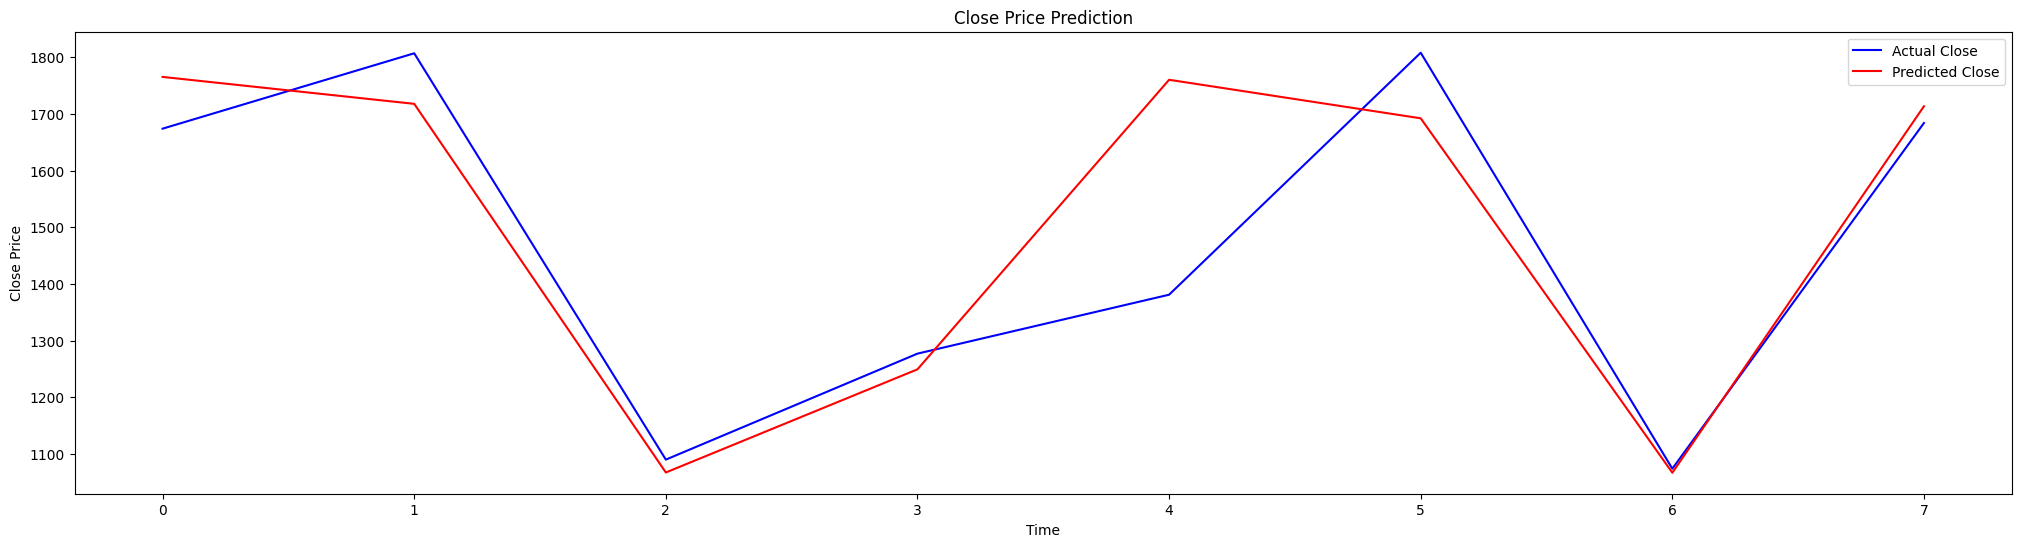

In [25]:
close_index = df_scaled.columns.get_loc("CB_n330_Avg") 

plt.figure(figsize=(25, 6))
plt.plot(y_test_rescaled[:, close_index], color='blue', label='Actual Close')
plt.plot(predictions[:, close_index], color='red', label='Predicted Close')
plt.title('Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [26]:
rmse = sqrt(mean_squared_error(y_test_rescaled[:, 0], predictions[:, 0]))
print(rmse)


1.682075287578519


In [27]:
from datetime import timedelta, datetime
import pandas as pd

# Function to predict future values
def predict_future(model, data, steps, scaler, window_size):
    future_predictions = []
    last_window = data[-window_size:]

    for _ in range(steps):
        next_pred = model.predict(last_window[np.newaxis, :, :])[0]
        future_predictions.append(next_pred)
        last_window = np.vstack([last_window[1:], next_pred])

    # Rescale predictions to original scale
    future_predictions_rescaled = scaler.inverse_transform(future_predictions)
    return future_predictions_rescaled

# Generate future dates for monthly intervals
last_date = df.index[-1]  # Get the last available date in the dataset
future_dates = [
    (last_date + timedelta(days=30 * i)).replace(day=1) for i in range(1, 6)
]  # Generate next 5 months' dates, adjusted to the first day of each month

# Predict the next 5 months
future_steps = 5
future_close_prices = predict_future(model, df_scaled.values, future_steps, scaler, window_size)

# Prepare DataFrame for future predictions
close_index = df.columns.get_loc("CB_n330_Avg")
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Close': future_close_prices[:, close_index]
})

# Display the future predictions with dates
print("Future Close Prices with Monthly Dates:")
print(future_df)


1/1 [==============================] - 0s 95ms/step
Future Close Prices with Monthly Dates:
        Date  Predicted Close
0 2023-08-01      1623.387810
1 2023-09-01      1584.246251
2 2023-10-01      1542.371601
3 2023-11-01      1498.216354
4 2023-12-01      1452.113222


In [28]:
correlation_matrix = df.corr()
print(correlation_matrix['CB_n330_Avg'])


Price           0.521215
Open            0.525889
High            0.536857
Low             0.526471
Vol.           -0.285624
CB_n330_Low     0.999988
CB_n330_High    0.999990
CB_n330_Avg     1.000000
BCO_Close       0.784876
Name: CB_n330_Avg, dtype: float64


In [29]:
from sklearn.metrics import mean_absolute_error

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test_rescaled[:, close_index], predictions[:, close_index]))
print(f"RMSE: {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test_rescaled[:, close_index], predictions[:, close_index])
print(f"MAE: {mae}")

# Calculate MAPE
mape = np.mean(np.abs((y_test_rescaled[:, close_index] - predictions[:, close_index]) / y_test_rescaled[:, close_index])) * 100
print(f"MAPE: {mape}%")

RMSE: 148.20498784978417
MAE: 95.31486511230469
MAPE: 6.3651435670680545%


In [30]:
from sklearn.metrics import mean_absolute_error

# Calculate MAPE
mape = np.mean(np.abs((y_test_rescaled[:, close_index] - predictions[:, close_index]) / y_test_rescaled[:, close_index])) * 100

# Calculate Accuracy
accuracy = 100 - mape

print(f"MAPE: {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")


MAPE: 6.37%
Accuracy: 93.63%
